# Credit card routing for Online purchase

## Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('/Users/0s/Downloads/PSP_Jan_Feb_2019.xlsx')

In [4]:
data.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


## Data exploration

In [5]:
data.shape

(50410, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB


In [7]:
data.isnull().sum()

Unnamed: 0    0
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [8]:
data.dtypes

Unnamed: 0             int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object

Delete unnamed column

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [11]:
data.describe()

,amount,success,3D_secured
count,50410.000000,50410.000000,50410.000000
mean,202.395715,0.202896,0.238266
std,96.274730,0.402160,0.426027
min,6.000000,0.000000,0.000000
25%,133.000000,0.000000,0.000000
50%,201.000000,0.000000,0.000000
75%,269.000000,0.000000,0.000000
max,630.000000,1.000000,1.000000


Find unique values in each column in the dataframe

In [12]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column name: {column}\n Unique values: {unique_values}\n")

Column name: tmsp
 Unique values: ['2019-01-01T00:01:11.000000000' '2019-01-01T00:01:17.000000000'
 '2019-01-01T00:02:49.000000000' ... '2019-02-28T23:47:04.000000000'
 '2019-02-28T23:47:36.000000000' '2019-02-28T23:48:19.000000000']

Column name: country
 Unique values: ['Germany' 'Austria' 'Switzerland']

Column name: amount
 Unique values: [ 89 238 124 282 117 174 232 268 205 111 277 137 148 394  84  34 324 251
 100 221 340 257 193  36 146 192  14 175 270 256 310 239  37  56 105 228
 322 367 190 186 121 274 264 132 279 104 184 258 209 260 383 109 161 127
 233 129 243 131 225 246 126  82 329 335 173 222 181  85  62 291 107  78
  22 164 203 113 379 224 242  45 158 140  13 197 215 151 208 116 263 136
 211 180 125 247 376 162 355 135 188  38 144  23 202 212 273 230 141 293
 336 163 350 374 176 218  53 267 255 216 450 301 271 183 198  19 214 147
 368 249  72 315 199 142 262  65  44 169 269 201 118 229 240 339 154 156
  86 250 390 297 308 223 191 170 488 304 219 444 189 317 200 172 206  6

## Univariate analysis

Distribution of the target variable

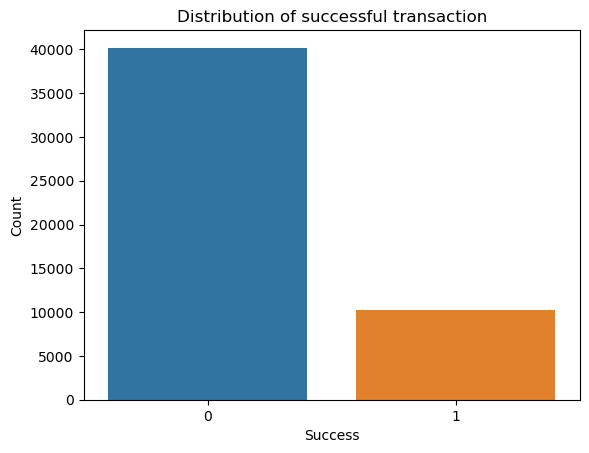

In [13]:
sns.countplot(x='success', data=data)
plt.title('Distribution of successful transaction')
plt.xlabel('Success')
plt.ylabel('Count')
plt.show()

In [14]:
total = data['success'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

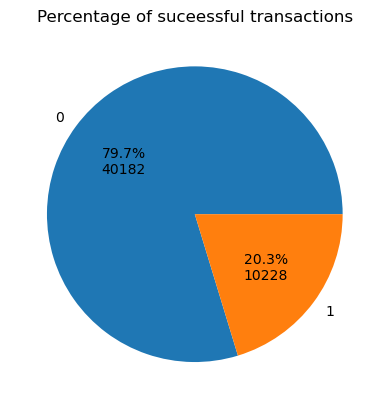

In [15]:
plt.pie(data['success'].value_counts().values, labels=data['success'].value_counts().index, autopct=fmt)
plt.title('Percentage of suceessful transactions')
plt.show()

Distribution of the country variable

In [16]:
total = data['country'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

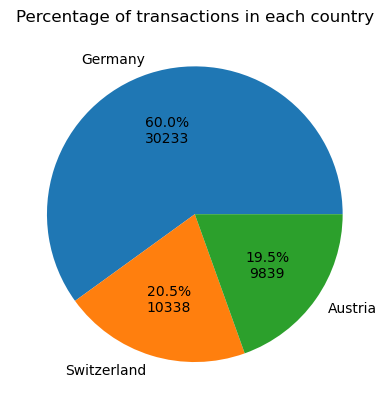

In [17]:
plt.pie(data['country'].value_counts().values, labels=data['country'].value_counts().index, autopct=fmt)
plt.title('Percentage of transactions in each country')
plt.show()

Distribution of the PSP variable

In [18]:
total = data['PSP'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

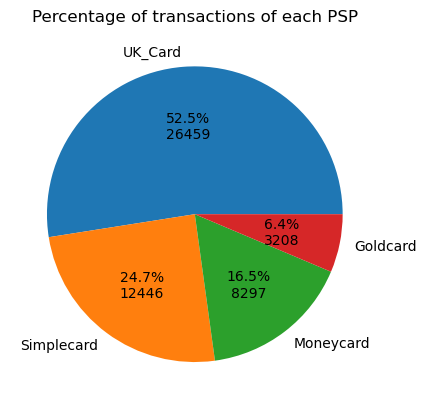

In [19]:
plt.pie(data['PSP'].value_counts().values, labels=data['PSP'].value_counts().index, autopct=fmt)
plt.title('Percentage of transactions of each PSP')
plt.show()

Distribution of the card variable

In [20]:
total = data['card'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

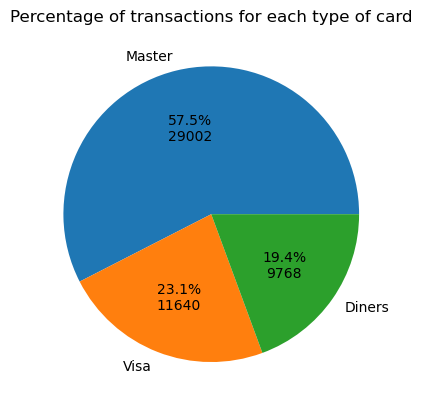

In [22]:
plt.pie(data['card'].value_counts().values, labels=data['card'].value_counts().index, autopct=fmt)
plt.title('Percentage of transactions for each type of card')
plt.show()

Distribution of the 3D_secured variable

In [23]:
total = data['3D_secured'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

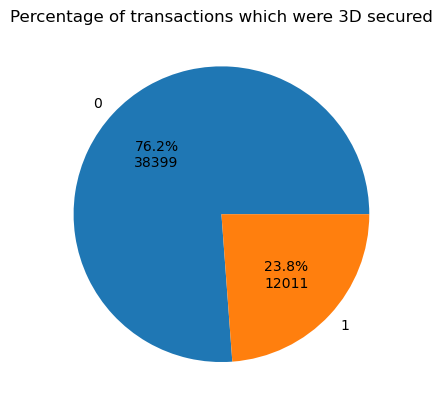

In [25]:
plt.pie(data['3D_secured'].value_counts().values, labels=data['3D_secured'].value_counts().index, autopct=fmt)
plt.title('Percentage of transactions which were 3D secured')
plt.show()

In [26]:
data.amount.describe()

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
25%        133.000000
50%        201.000000
75%        269.000000
max        630.000000
Name: amount, dtype: float64

Transaction amount distribution

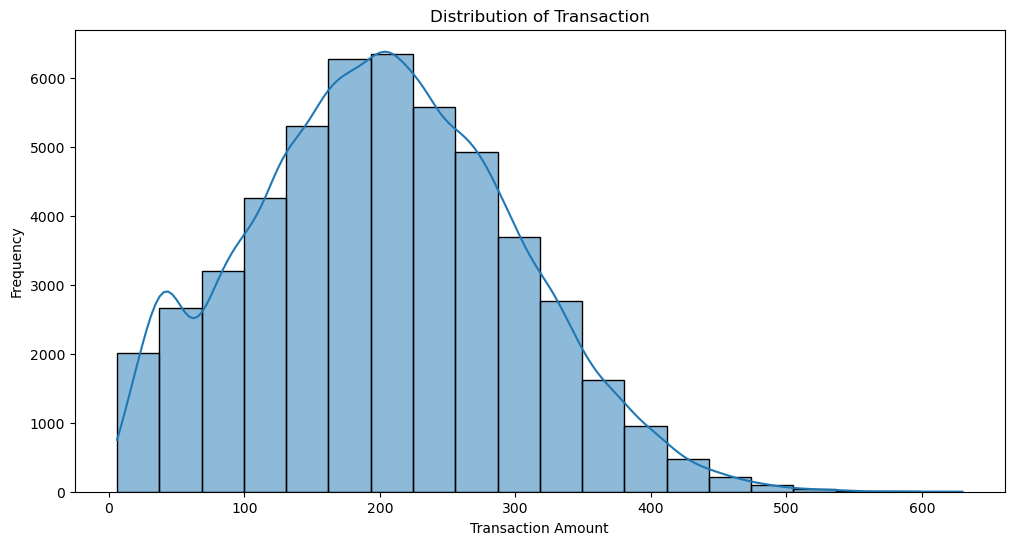

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(data['amount'], bins=20, kde=True)
plt.title('Distribution of Transaction')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

- The distribution is right-skewed, indicating a higher occurence of lower transaction amounts and fewer high-value transactions.
- the long tail towards the right shows that while low-value transactions are common, there are transactions with extreme amounts, which could be outliers.

In [28]:
print("Time range of transactions is between {} and {}".format(data.tmsp.min(), data.tmsp.max()))

Time range of transactions is between 2019-01-01 00:01:11 and 2019-02-28 23:48:19


## Bivariate analysis

In [29]:
data.columns

Index(['tmsp', 'country', 'amount', 'success', 'PSP', '3D_secured', 'card'], dtype='object')

Relationship between variables country and transaction amount

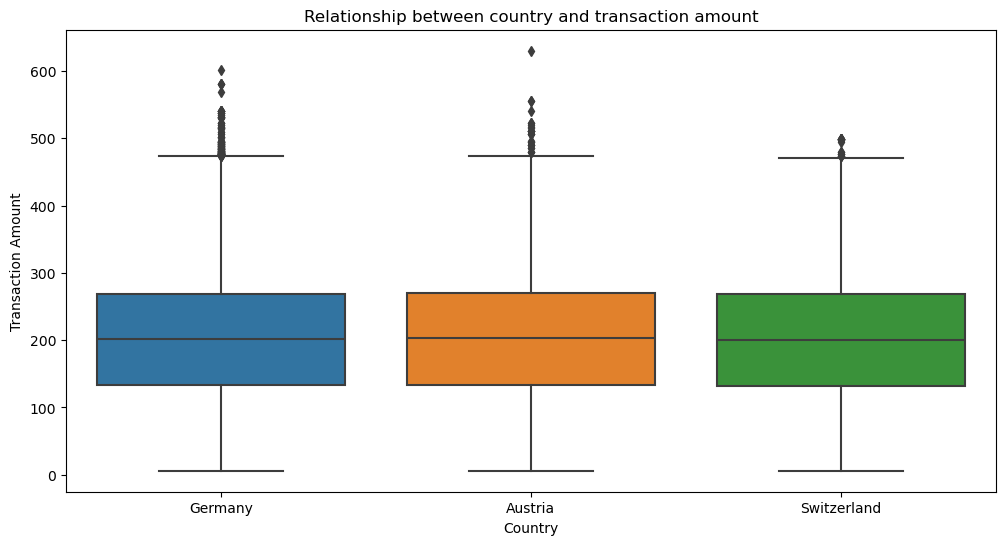

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='country', y='amount', data=data)
plt.title('Relationship between country and transaction amount')
plt.xlabel('Country')
plt.ylabel('Transaction Amount')
plt.show()

- Austria shows the highest variability for extremem transaction values, as indicated by the spread and outliers.
- Three countries has the same median values but Austria has the most extreme values, followed by Germany and Switzerland, respectively.

Relationship between variables PSP and transaction amount

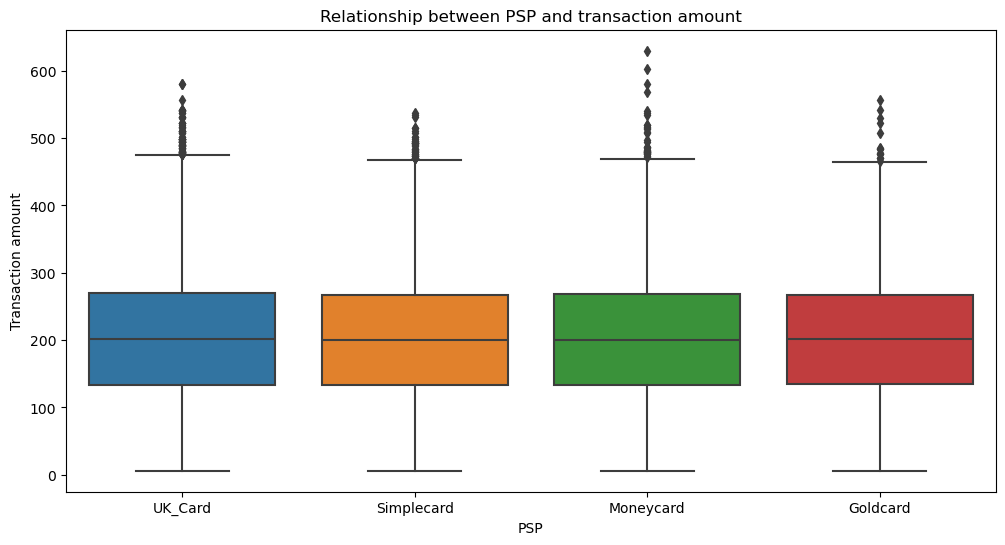

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='PSP', y='amount', data=data)
plt.title('Relationship between PSP and transaction amount')
plt.xlabel('PSP')
plt.ylabel('Transaction amount')
plt.show()

- All PSPs have outliers, with PSP Moneycard shows the highest transaction amount outliers, indicating that some high-value transaction were processed by this provider.

Relationship between 3D_secured and transaction amount

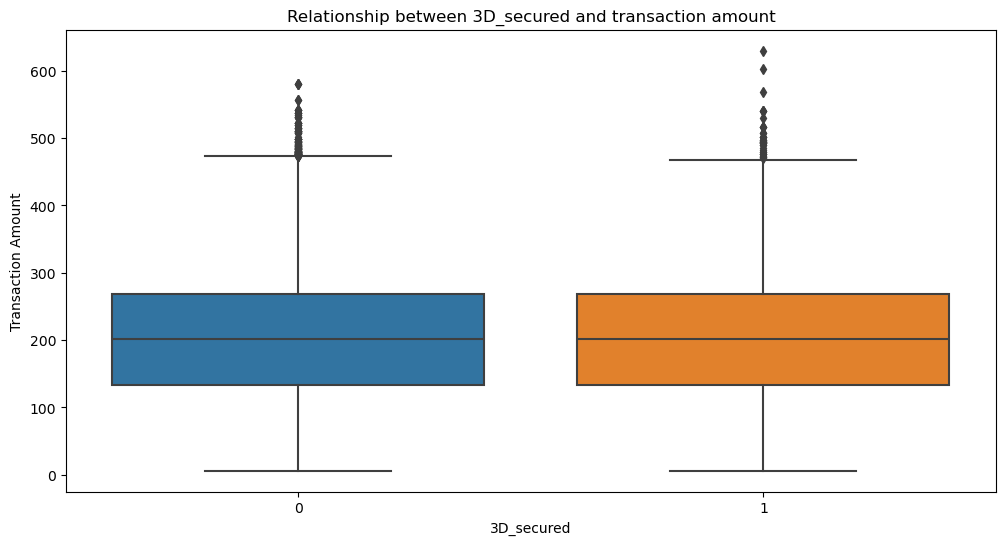

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='3D_secured', y='amount', data=data)
plt.title('Relationship between 3D_secured and transaction amount')
plt.xlabel('3D_secured')
plt.ylabel('Transaction Amount')
plt.show()

- Transactions that are not 3D secured exhibit a more compact interquartile range, suggesting less variability in transaction amounts compared to the 3D secured ones.

Relationship between card and transaction amount

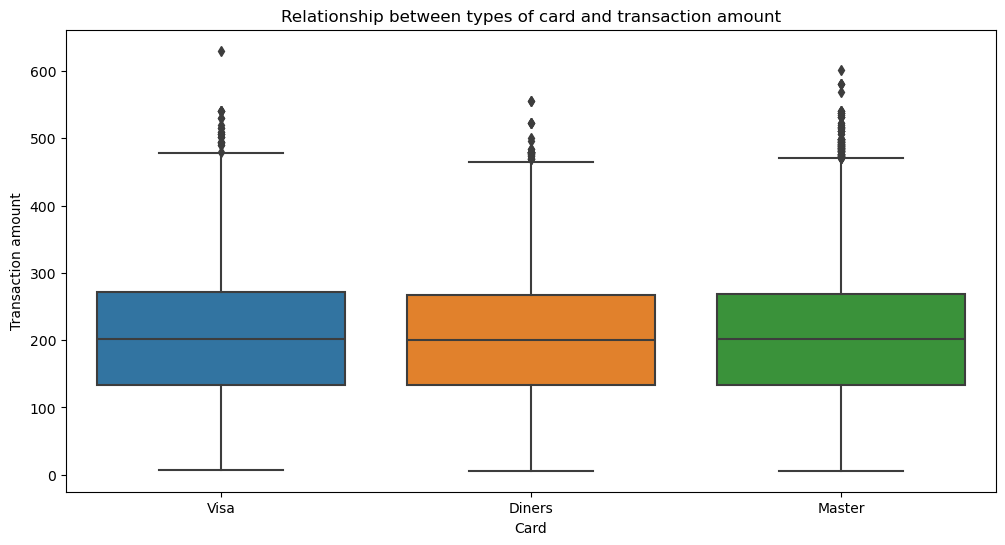

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='card', y='amount', data=data)
plt.title('Relationship between types of card and transaction amount')
plt.xlabel('Card')
plt.ylabel('Transaction amount')
plt.show()

Relationship between transaction success and transaction amount

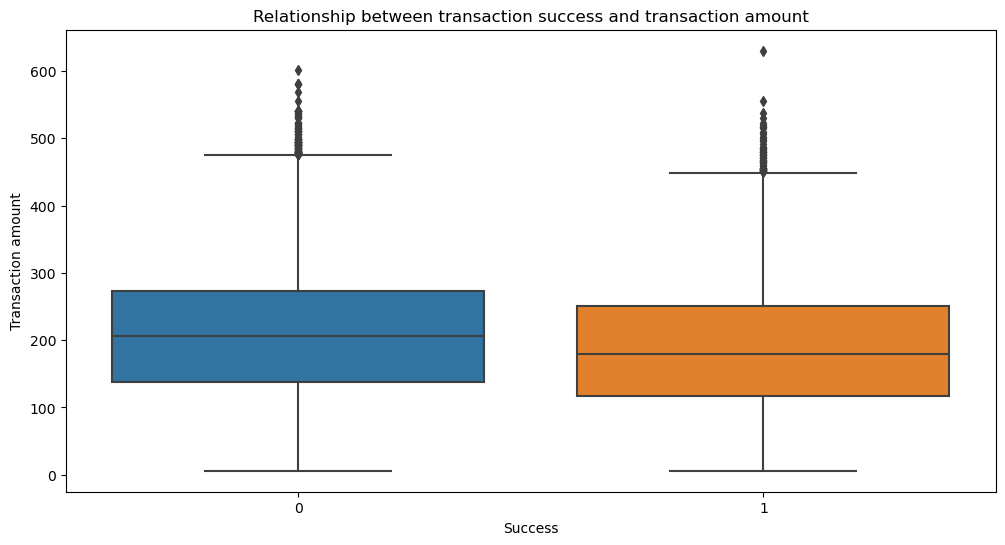

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x='success', y='amount', data=data)
plt.title('Relationship between transaction success and transaction amount')
plt.xlabel('Success')
plt.ylabel('Transaction amount')
plt.show()

- Both successed and unsuccessed transactions exhibit a wide range of amounts, with the median amount for unsuccessed transaction being higher than for successed ones.

Relationship between card and transaction success

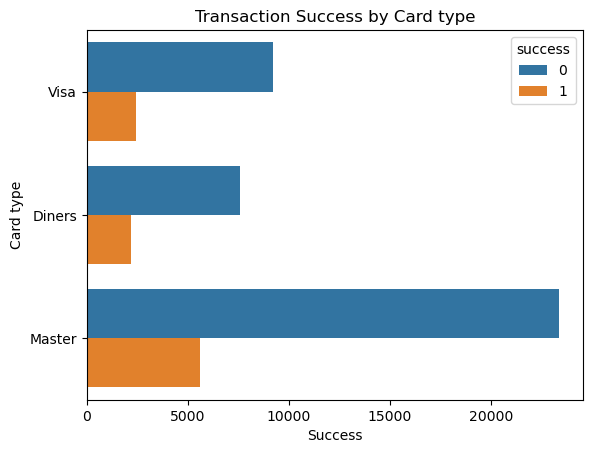

In [36]:
sns.countplot(hue='success', y='card', data=data)
plt.title('Transaction Success by Card type')
plt.xlabel('Success')
plt.ylabel('Card type')
plt.show()